# PBMC CITE-Seq RNA Processing

In [1]:
import scanpy as sc
import os
import pandas as pd
import numpy as np
import pickle as pkl
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats

sc.settings.verbosity = 3

In [2]:
data = pd.read_csv("../../CITE-seq/GSE100866_PBMC_vs_flow_10X-RNA_umi.csv", index_col=0)
data.head()

ACCGTAAGTGTAATGA  CGTGAGCTCGAGAACG  CACATTTAGAATTCCC  \
HUMAN_A1BG                     0                 0                 0   
HUMAN_A1BG-AS1                 0                 0                 0   
HUMAN_A2M                      0                 0                 0   
HUMAN_A2M-AS1                  0                 0                 0   
HUMAN_AAAS                     0                 0                 0   

                TACGGTATCTGGGCCA  TCAGGTAGTAAGTTCC  TGATTTCGTTCTCATT  \
HUMAN_A1BG                     0                 0                 0   
HUMAN_A1BG-AS1                 0                 0                 0   
HUMAN_A2M                      0                 0                 0   
HUMAN_A2M-AS1                  0                 0                 0   
HUMAN_AAAS                     0                 0                 0   

                ACACTGAAGGCCCTCA  ACGGGTCGTCACACGC  AGCTTGACATCCCATC  \
HUMAN_A1BG                     0                 0                 0   
HUMAN_A1BG-AS1                 0                 0                 0   
HUMAN_A2M                      0                 0                 0   
HUMAN_A2M-AS1                  0                 0                 0   
HUMAN_AAAS                     0                 0                 0   

                ACGTCAATCCGTCATC  ...  TTCTCCTAGATCGATA  GGAAAGCGTCGACTAT  \
HUMAN_A1BG                     0  ...                 0                 0   
HUMAN_A1BG-AS1                 0  ...                 0                 0   
HUMAN_A2M                      0  ...                 0                 0   
HUMAN_A2M-AS1                  0  ...                 0                 2   
HUMAN_AAAS                     0  ...                 0                 0   

                GACTAACCAACACCCG  AGCGTCGTCCTCGCAT  TCTCATAAGTTTGCGT  \
HUMAN_A1BG                     0                 0                 0   
HUMAN_A1BG-AS1                 0                 0                 0   
HUMAN_A2M                      0                 0                 0   
HUMAN_A2M-AS1                  0                 0                 0   
HUMAN_AAAS                     0                 0                 0   

                GTCGGGTAGAGCTGGT  GTCGGGTAGGTAGCCA  GTCGGGTAGTCTTGCA  \
HUMAN_A1BG                     0                 0                 0   
HUMAN_A1BG-AS1                 0                 0                 0   
HUMAN_A2M                      0                 0                 0   
HUMAN_A2M-AS1                  0                 0                 0   
HUMAN_AAAS                     1                 0                 0   

                ATGTGTGGTCCGTTAA  CGTATGCCGTCTTCTG  
HUMAN_A1BG                     0                 0  
HUMAN_A1BG-AS1                 0                 0  
HUMAN_A2M                      0                 0  
HUMAN_A2M-AS1                  0                 0  
HUMAN_AAAS                     0                 0  

[5 rows x 7985 columns]

Number of human cells 7667


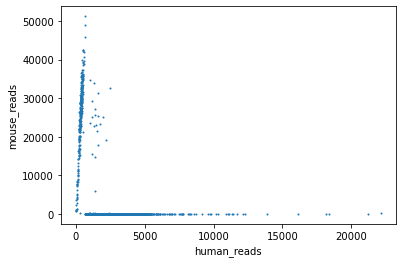

In [3]:
human_reads = data.loc[data.index.str.contains("HUMAN_"), :].sum(axis=0)
mouse_reads = data.loc[data.index.str.contains("MOUSE_"), :].sum(axis=0)
plt.scatter(human_reads, mouse_reads, s=1.)
plt.xlabel("human_reads")
plt.ylabel("mouse_reads")

human_cell_mask = human_reads / mouse_reads > 9
print("Number of human cells", sum(human_cell_mask))

In [4]:
data = data.loc[data.index.str.contains("HUMAN_"), human_cell_mask]
data.index = data.index.str[6:]

In [5]:
adata = sc.AnnData(data.T)

In [6]:
adata

AnnData object with n_obs × n_vars = 7667 × 17014

In [7]:
adata.obs

Empty DataFrame
Columns: []
Index: [TGACTAGTCCCAAGTA, GACCTGGAGTCTCAAC, GATCTAGCATTCTTAC, CATATGGCATCCCACT, CACATAGGTCTCCACT, ATAGACCAGCCAGTAG, CACAGTAAGATCTGCT, GTTCTCGGTCGTTGTA, CACACCTCAATTGCTG, GGAATAACACGCGAAA, AACTTTCCAGGTCTCG, AGTCTTTGTACTCTCC, TCCACACAGAATGTTG, TAAGTGCTCTCGTATT, AAGGAGCGTTTAGGAA, TGCACCTCAGGATCGA, AAACCTGTCAGCACAT, TTCTTAGCATATACGC, TCGAGGCTCTGCTTGC, GAATAAGAGTCTCGGC, GTGCATATCGGTTAAC, AGTGTCAGTGTTTGGT, CGCGGTAGTGTCCTCT, CGGTTAAGTGTTCTTT, AGAGCTTCACCGTTGG, TCGTACCCAAAGGTGC, GTAACTGGTGATGCCC, TTCTTAGGTAGTACCT, AGAGCTTAGGACGAAA, CACACAAAGACAGAGA, ACGTCAAGTCAGAGGT, CGACCTTCAAGAGTCG, CATTATCTCCCAAGTA, GAATAAGTCAGTGTTG, CACAGGCTCCTTTACA, GTTTCTAAGTCGTACT, CTTACCGTCGGCGCTA, TCAGCTCCATCCGGGT, GCGCAGTCACGAAACG, CGGACGTCAAAGCAAT, TATTACCCAGTGACAG, TGCCAAATCTGACCTC, CGTGAGCAGGTTCCTA, CCCAGTTCAAATCCGT, AAACCTGCACGTTGGC, ACCGTAATCCATGCTC, CGATTGATCAAACAAG, CACTCCAGTTGATTGC, AGTGAGGTCGGAATCT, GCAATCATCCACGACG, CAGAATCGTCTAGTCA, GGGTTGCCAGATGGGT, TCATTTGGTACTTGAC, ACGGGTCTCATAACCG, GGGCACTGTCTCCCTA, CCTTACGGTCAAACTC, CCTACCAGTGCATCTA, CGTCACTCAGTTAACC, GGTGCGTGTTCAGCGC, GGAAAGCGTTACTGAC, CATCCACGTCCATCCT, GGAGCAACATCGGTTA, TCGGTAAAGGTACTCT, TGCGCAGGTCTAGTCA, AGTGAGGCAGACGCAA, CGCTGGACATCACGTA, GTACGTATCACTCTTA, GCAATCAGTGCATCTA, GAATAAGGTACGCTGC, TGAGGGATCTGGTATG, CGCGGTACAGCCAGAA, CGGACGTCAGCCTTGG, CGATCGGTCGGTTCGG, TTCGGTCCACTTAAGC, GAAATGACAAAGTCAA, GAGCAGAAGAGACGAA, ACGTCAACAATGCCAT, CGTTCTGAGTAAGTAC, GCATGCGGTCTTCTCG, GCATGATGTTGGTGGA, TGGGAAGTCATATCGG, CTTTGCGGTCCCTTGT, GATGCTAGTCCCTTGT, TGAGCCGGTATCAGTC, CGGTTAAGTCTTGCGG, AAGGTTCAGCTAGTCT, TGAGAGGCACAGATTC, ATCCACCCACATCCAA, GGACGTCGTGATGATA, TGGTTAGAGGGTGTGT, GGTGAAGAGAAACCTA, AACTCCCTCTCATTCA, CCGTACTAGTGAACAT, GTACGTAGTACGCTGC, AGCAGCCGTTGGGACA, ATTGGACGTTCCGGCA, TGGCTGGAGCGATATA, ATCACGAAGCTAACTC, CTAAGACGTCTAACGT, CGTTGGGCAACTTGAC, ...]

[7667 rows x 0 columns]

In [8]:
temp = pd.read_csv("../../CITE-seq/human-pbmc-cell.csv", index_col=0)
adata.obs['cell subtype'] = temp['cell subtype']
adata.obs['cell type'] = temp['cell type']

normalizing counts per cell
    finished (0:00:00)


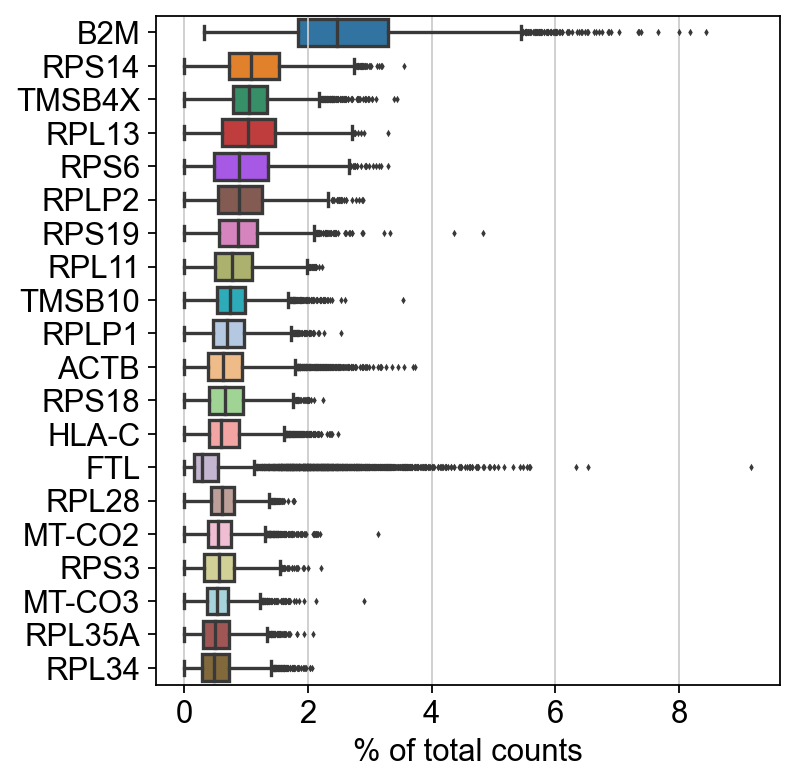

In [9]:
sc.settings.set_figure_params(dpi=80, facecolor='white')
sc.pl.highest_expr_genes(adata, n_top=20)

In [10]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

C:\Users\SLiang3\Miniconda3\envs\scanpy37\lib\site-packages\anndata\_core\anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


filtered out 175 genes that are detected in less than 3 cells


C:\Users\SLiang3\Miniconda3\envs\scanpy37\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\SLiang3\Miniconda3\envs\scanpy37\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\SLiang3\Miniconda3\envs\scanpy37\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\SLiang3\Miniconda3\envs\scanpy37\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


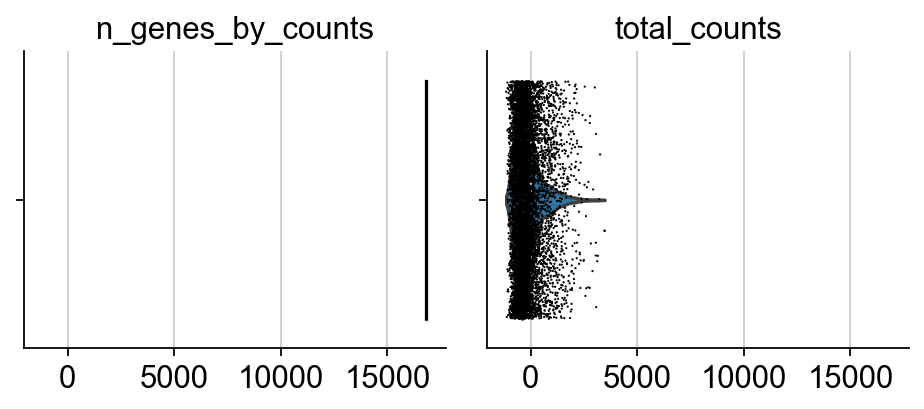

C:\Users\SLiang3\Miniconda3\envs\scanpy37\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\SLiang3\Miniconda3\envs\scanpy37\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


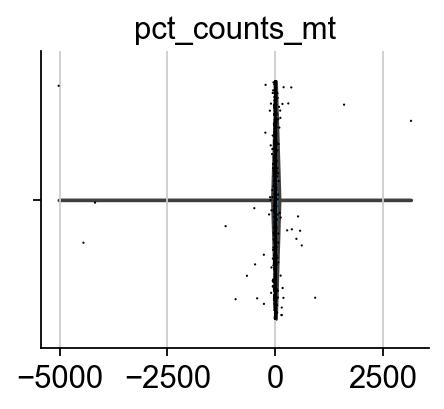

In [44]:
adata.var['mt'] = adata.var.index.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts'], jitter=0.4, multi_panel=True)
sc.pl.violin(adata, ['pct_counts_mt'], jitter=0.4, multi_panel=True)

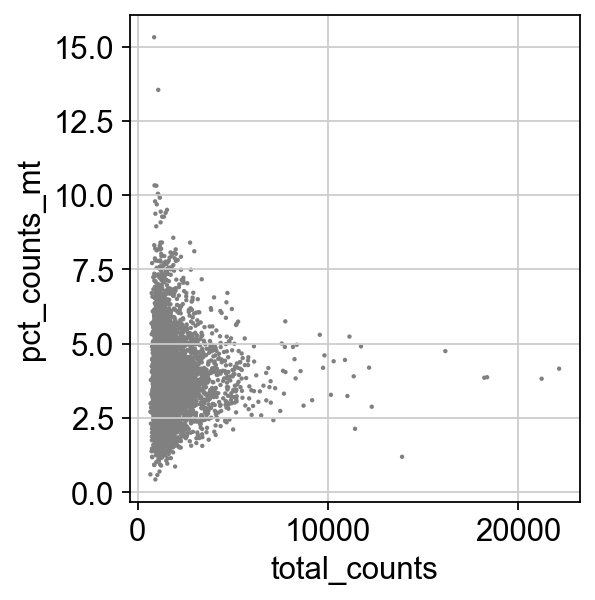

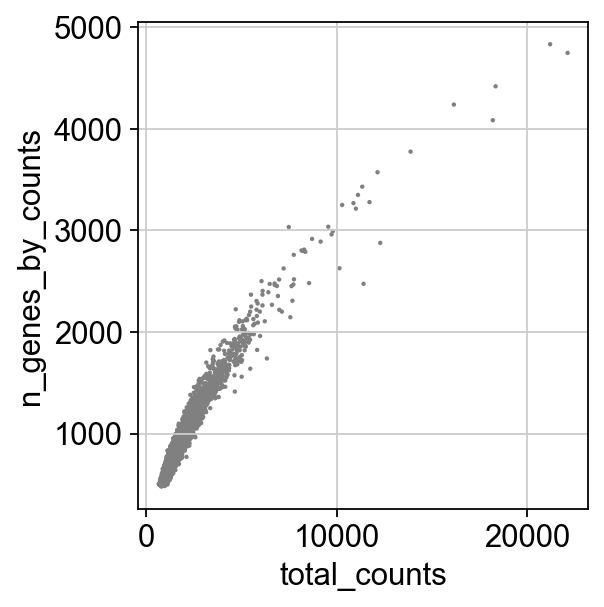

In [12]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [13]:
adata = adata[adata.obs.n_genes_by_counts < 3000, :]
adata = adata[adata.obs.pct_counts_mt < 8.5, :]

adata

C:\Users\SLiang3\Miniconda3\envs\scanpy37\lib\site-packages\anndata\_core\anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
C:\Users\SLiang3\Miniconda3\envs\scanpy37\lib\site-packages\anndata\_core\anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


View of AnnData object with n_obs × n_vars = 7634 × 16839
    obs: 'cell subtype', 'cell type', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [14]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

C:\Users\SLiang3\Miniconda3\envs\scanpy37\lib\site-packages\scanpy\preprocessing\_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


normalizing counts per cell
    finished (0:00:00)


If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


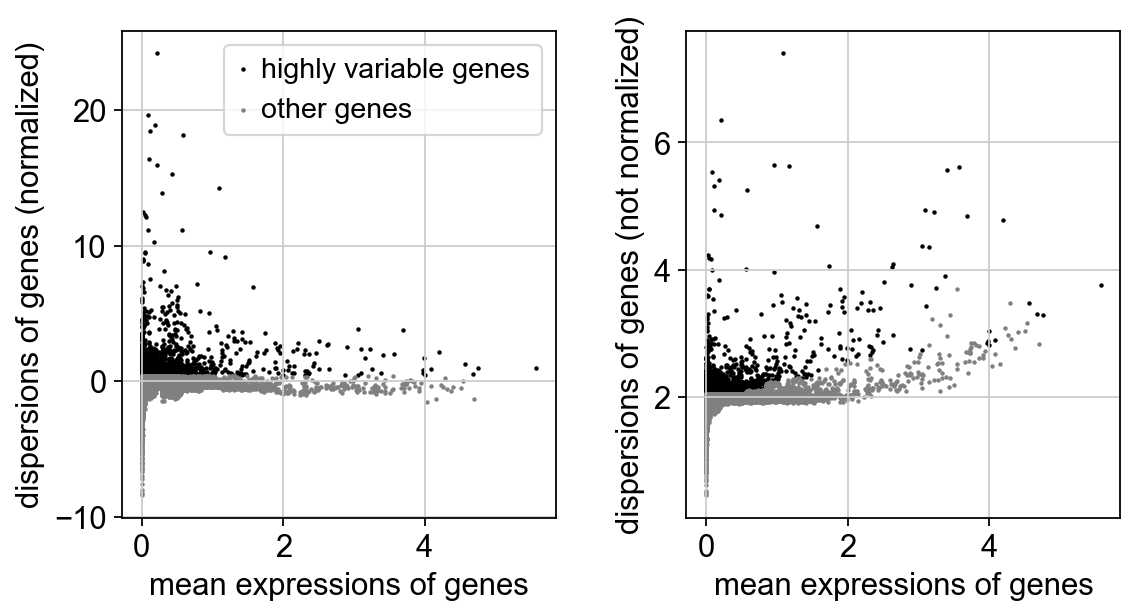

In [15]:
sc.pp.highly_variable_genes(adata, n_top_genes=3000)
sc.pl.highly_variable_genes(adata)

In [16]:
adata.var.highly_variable[adata.var.index.isin(['CD2',
                                                'CD3D', 'CD3E', 'CD3G',
                                                'CD4',
                                                'CD8A', 'CD8B',
                                                'ITGAX',
                                                'CD14',
                                                'FCGR3A', 'FCGR3B',
                                                'CD19',
                                                'PTPRC',
                                                'B3GAT1'
                                                ])]

B3GAT1     True
CD14       True
CD19       True
CD2        True
CD3D       True
CD3E      False
CD3G       True
CD4       False
CD8A       True
CD8B       True
FCGR3A     True
FCGR3B    False
ITGAX     False
PTPRC     False
Name: highly_variable, dtype: bool

In [17]:
adata.var.highly_variable[adata.var.index.isin(['CD2',
                                                'CD3D', 'CD3E', 'CD3G',
                                                'CD4',
                                                'CD8A', 'CD8B',
                                                'ITGAX',
                                                'CD14',
                                                'FCGR3A', 'FCGR3B',
                                                'CD19',
                                                'PTPRC',
                                                'B3GAT1'
                                                ])] = True

C:\Users\SLiang3\Miniconda3\envs\scanpy37\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [18]:
#sc.pp.regress_out(adata, 'total_counts')

In [19]:
sc.pp.scale(adata, max_value=10)
adata.raw = adata

In [20]:
#adata = adata[:, adata.var.highly_variable]
adata

AnnData object with n_obs × n_vars = 7634 × 16839
    obs: 'cell subtype', 'cell type', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg'

In [21]:
sc.tl.pca(adata, svd_solver='arpack')

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:02)


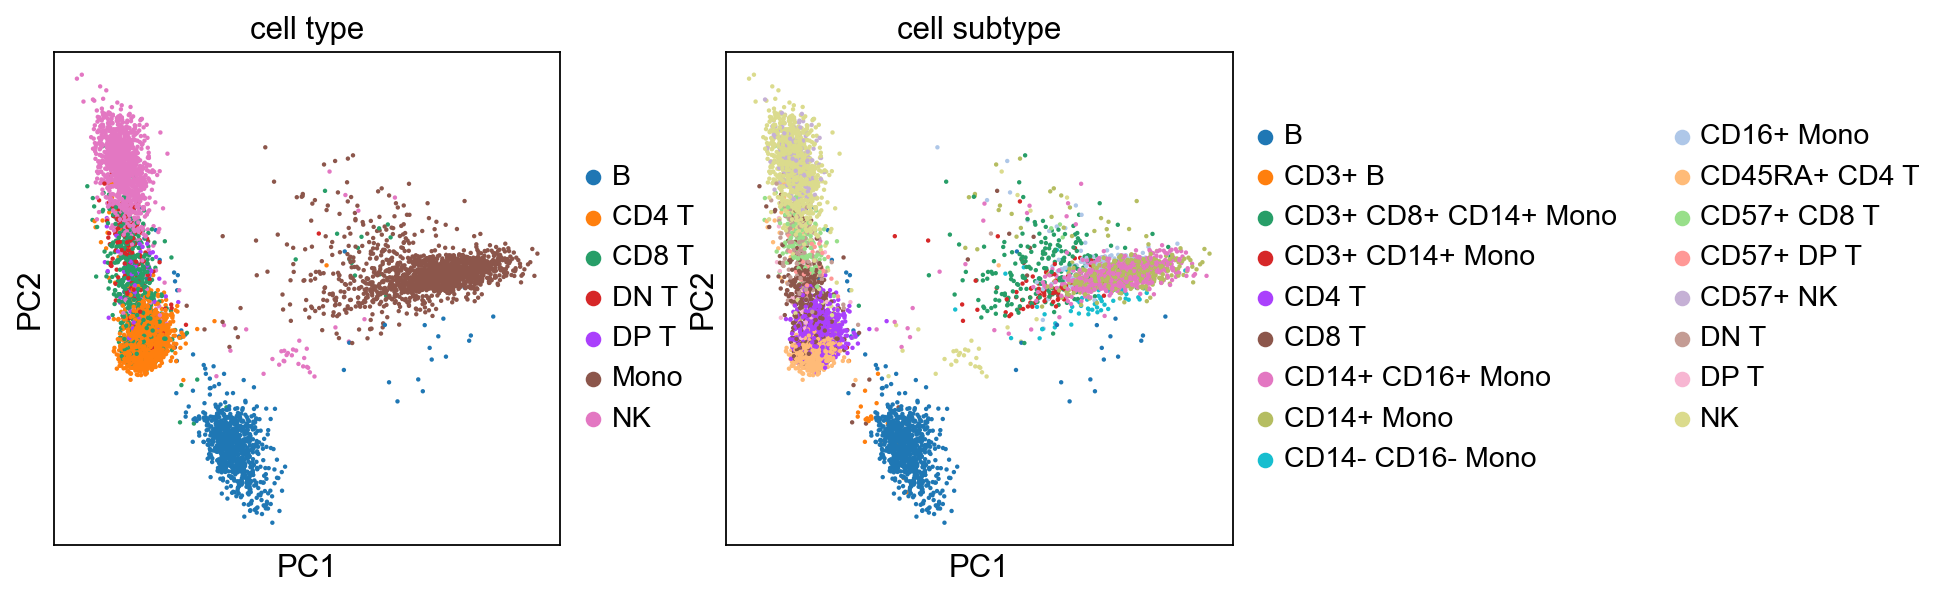

In [28]:
sc.pl.pca(adata, color=['cell type', 'cell subtype'])

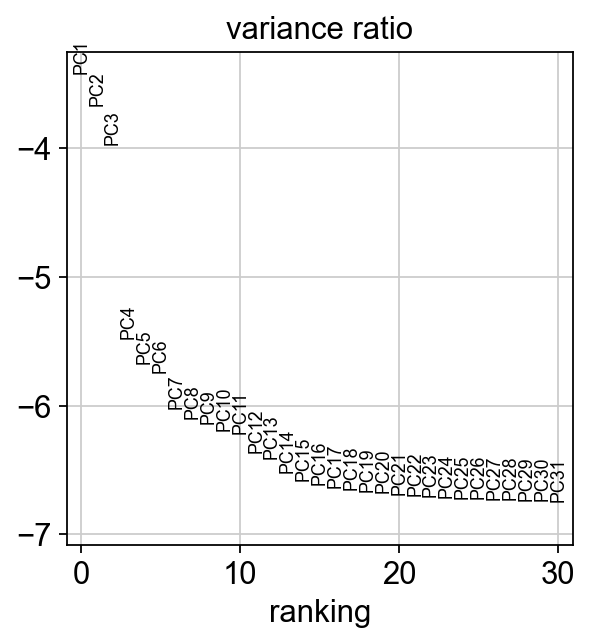

In [23]:
sc.pl.pca_variance_ratio(adata, log=True)

computing neighbors
    using 'X_pca' with n_pcs = 5
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:09)
running Leiden clustering
    finished: found 17 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


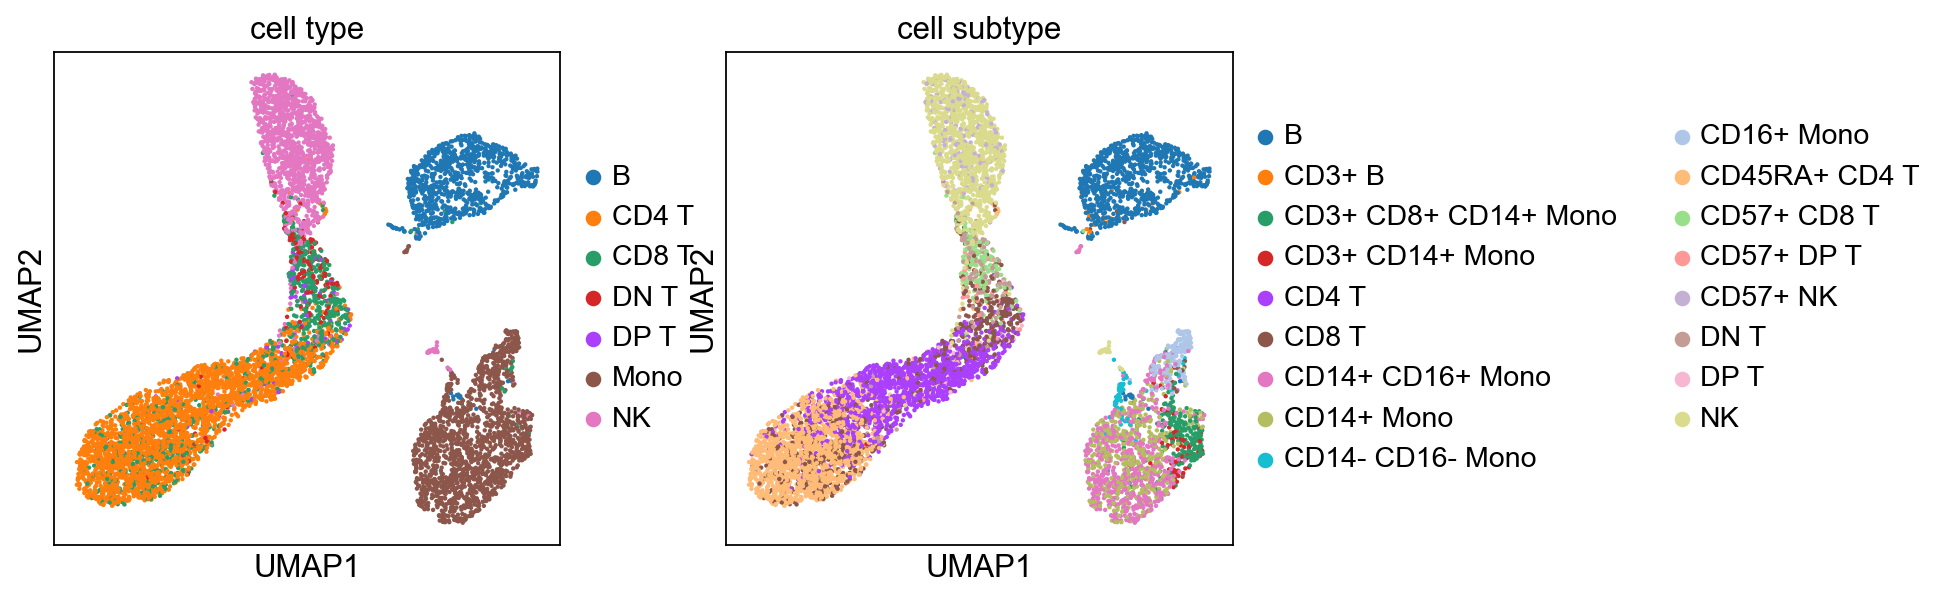

In [41]:
sc.pp.neighbors(adata, n_pcs=5)
sc.tl.umap(adata)
sc.tl.leiden(adata)
sc.pl.umap(adata, color=['cell type', 'cell subtype'])

computing neighbors
    using 'X_pca' with n_pcs = 6
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:09)
running Leiden clustering
    finished: found 16 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


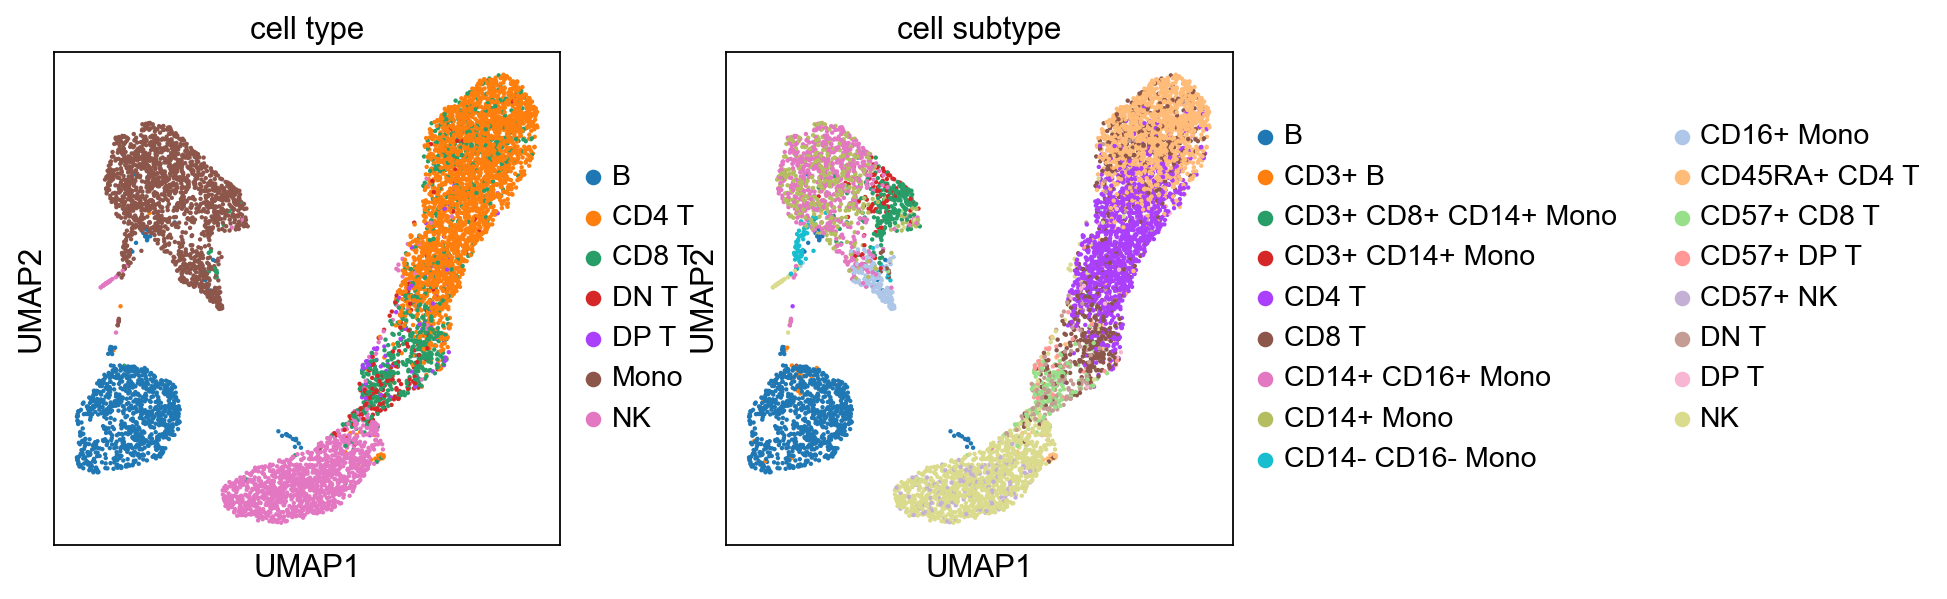

In [38]:
sc.pp.neighbors(adata, n_pcs=6)
sc.tl.umap(adata)
sc.tl.leiden(adata)
sc.pl.umap(adata, color=['cell type', 'cell subtype'])

computing neighbors
    using 'X_pca' with n_pcs = 7
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:09)
running Leiden clustering
    finished: found 17 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:01)


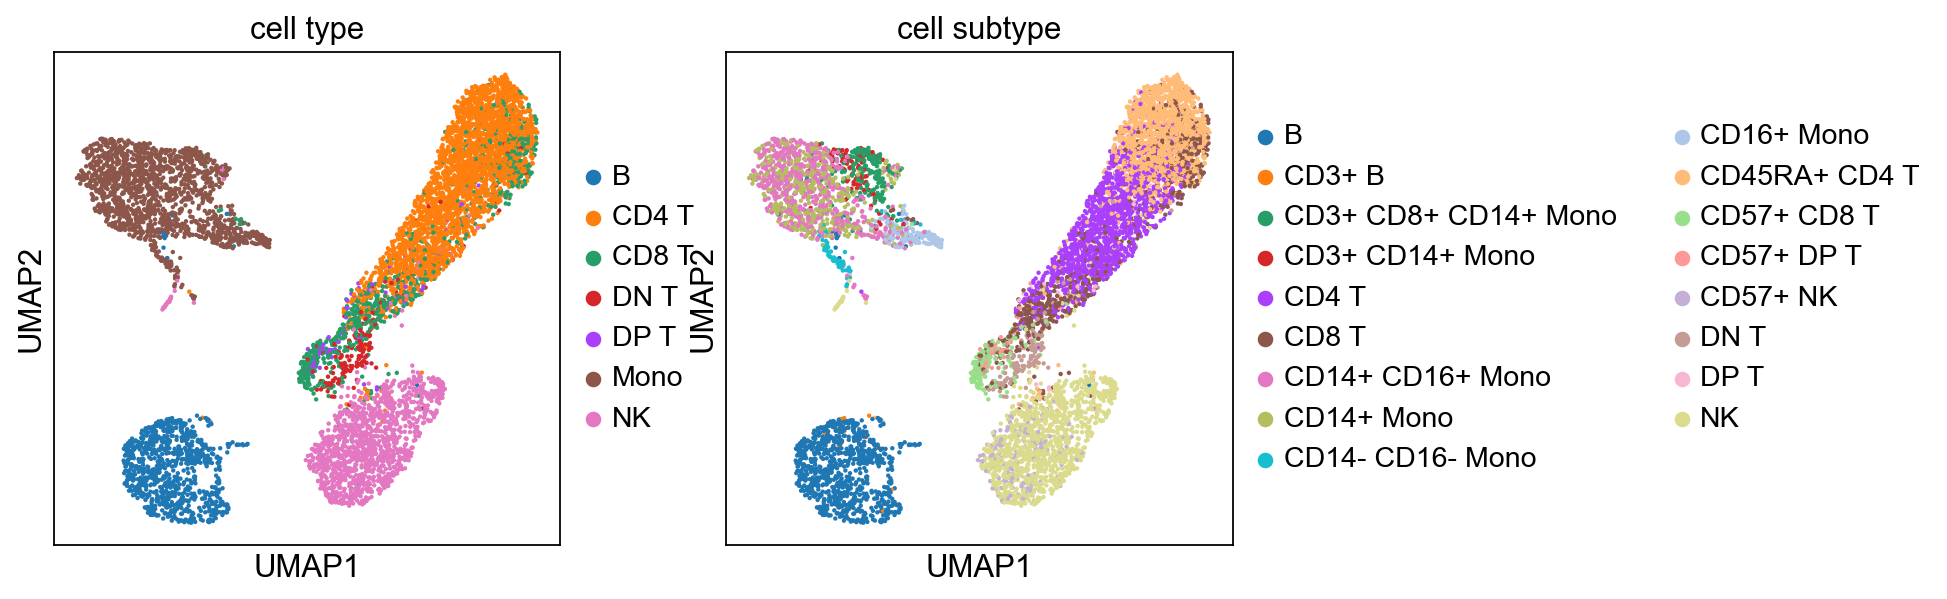

In [39]:
sc.pp.neighbors(adata, n_pcs=7)
sc.tl.umap(adata)
sc.tl.leiden(adata)
sc.pl.umap(adata, color=['cell type', 'cell subtype'])

computing neighbors
    using 'X_pca' with n_pcs = 8
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:10)
running Leiden clustering
    finished: found 14 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:01)


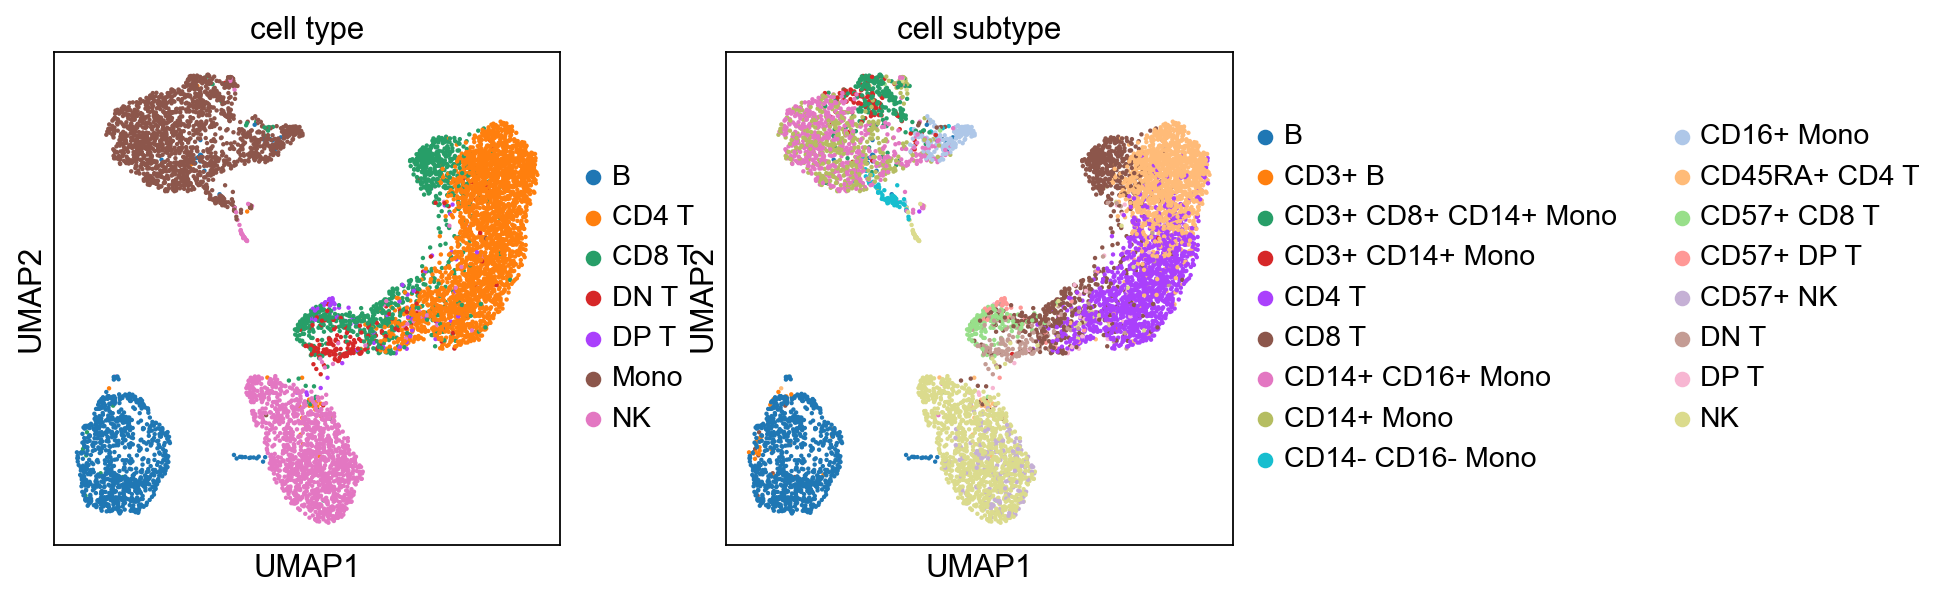

In [37]:
sc.pp.neighbors(adata, n_pcs=8)
sc.tl.umap(adata)
sc.tl.leiden(adata)
sc.pl.umap(adata, color=['cell type', 'cell subtype'])

computing neighbors
    using 'X_pca' with n_pcs = 9
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:10)
running Leiden clustering
    finished: found 15 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:01)


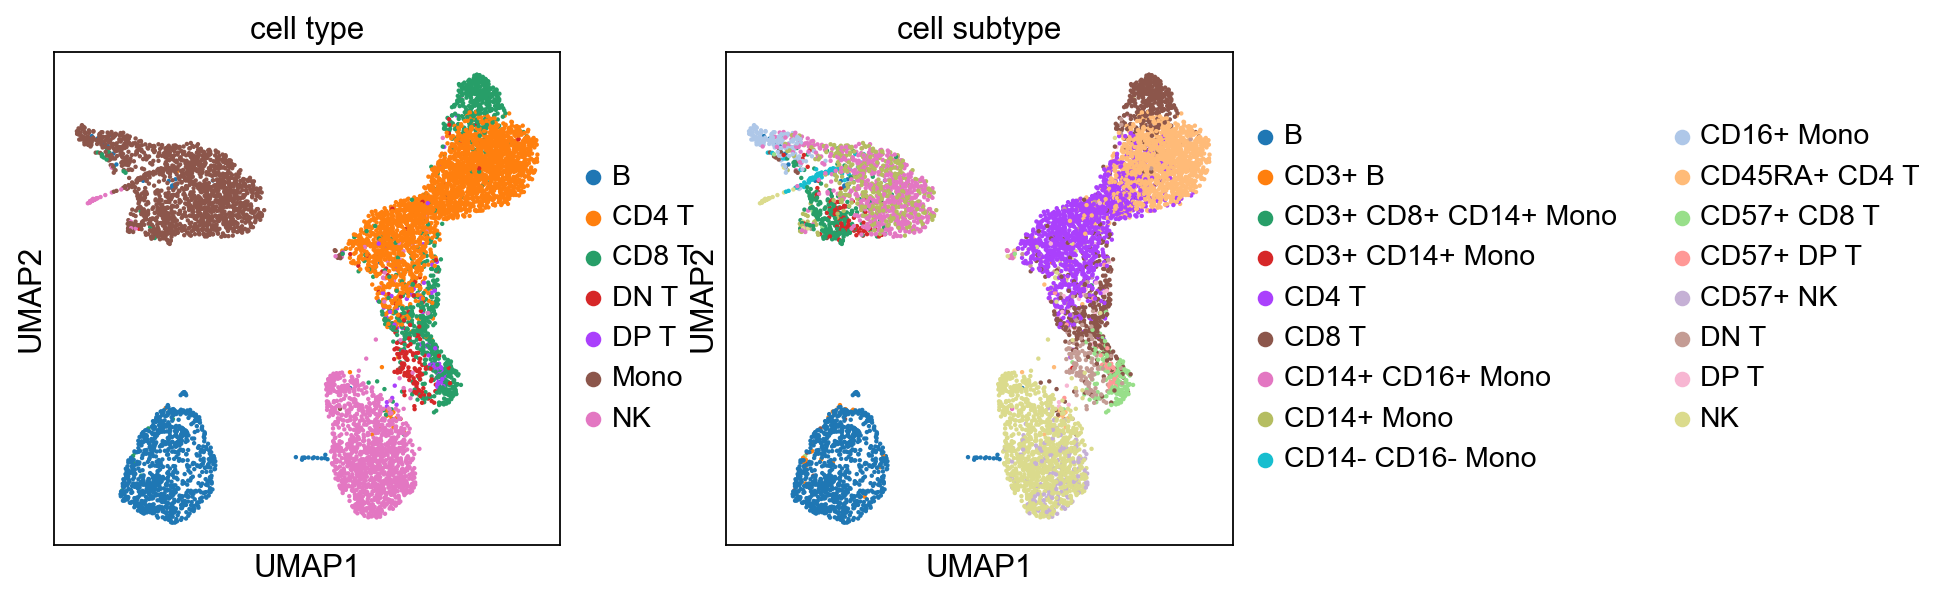

In [40]:
sc.pp.neighbors(adata, n_pcs=9)
sc.tl.umap(adata)
sc.tl.leiden(adata)
sc.pl.umap(adata, color=['cell type', 'cell subtype'])

computing neighbors
    using 'X_pca' with n_pcs = 10
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:10)
running Leiden clustering
    finished: found 16 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:02)


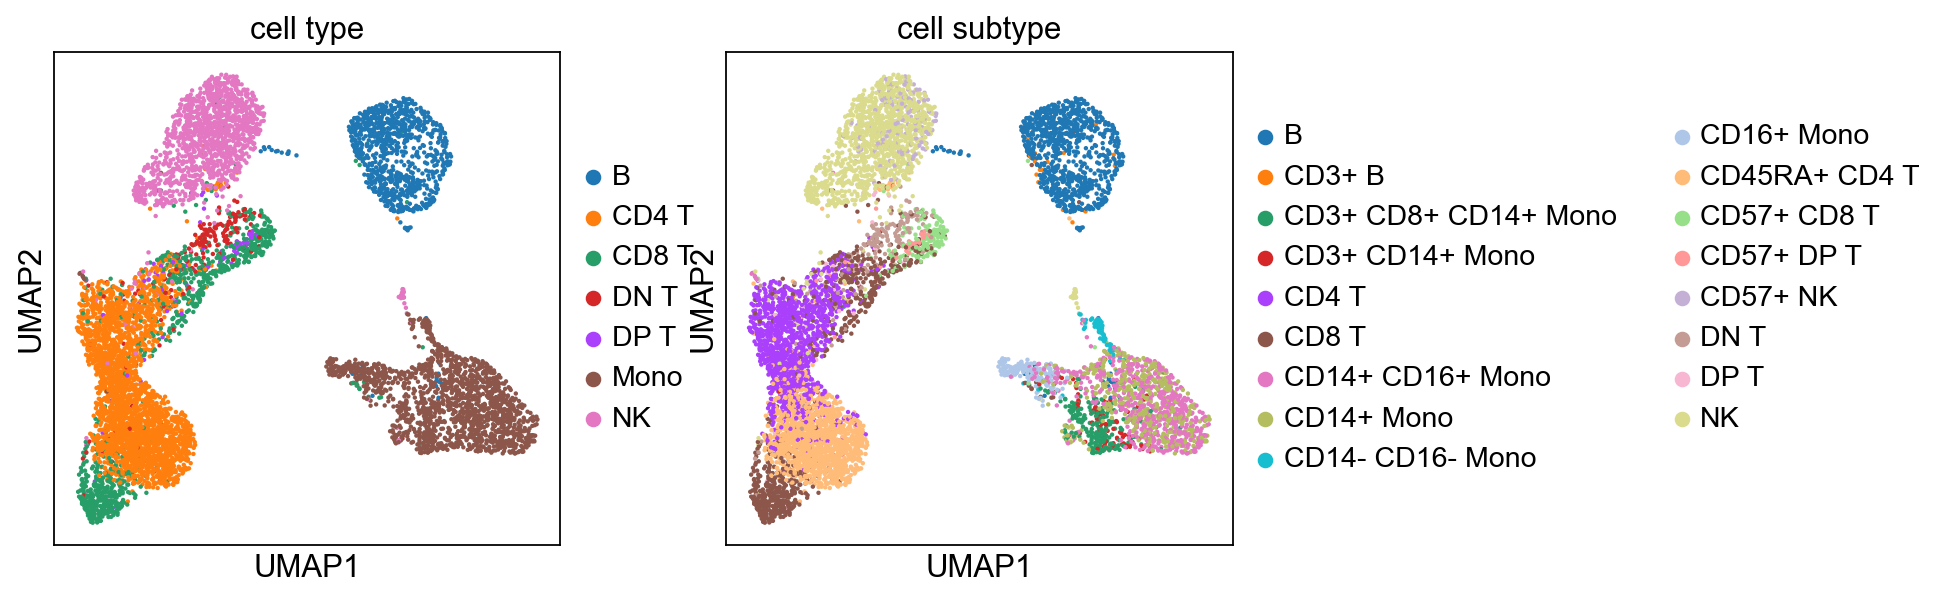

In [36]:
sc.pp.neighbors(adata, n_pcs=10)
sc.tl.umap(adata)
sc.tl.leiden(adata)
sc.pl.umap(adata, color=['cell type', 'cell subtype'])

computing neighbors
    using 'X_pca' with n_pcs = 15
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:10)
running Leiden clustering
    finished: found 17 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:01)


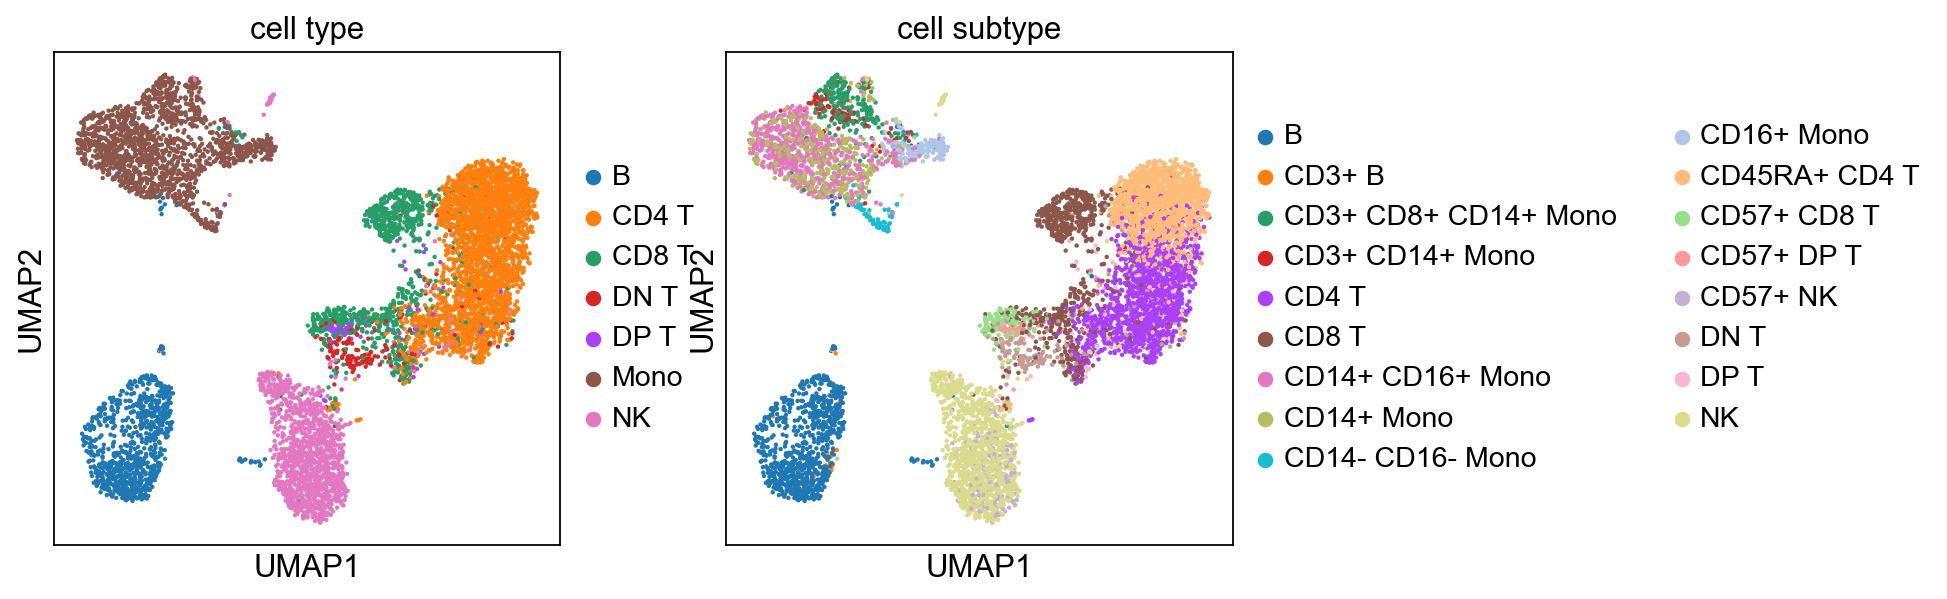

In [42]:
sc.pp.neighbors(adata, n_pcs=15)
sc.tl.umap(adata)
sc.tl.leiden(adata)
sc.pl.umap(adata, color=['cell type', 'cell subtype'])

computing neighbors
    using 'X_pca' with n_pcs = 15
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:10)
running Leiden clustering
    finished: found 17 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:01)


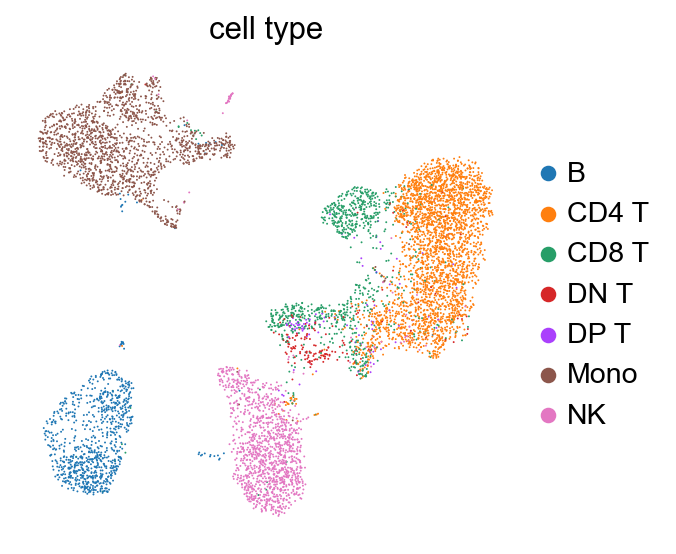

In [46]:
sc.pp.neighbors(adata, n_pcs=15)
sc.tl.umap(adata)
sc.tl.leiden(adata)
sc.pl.umap(adata, color=['cell type'], size=3., frameon=False)

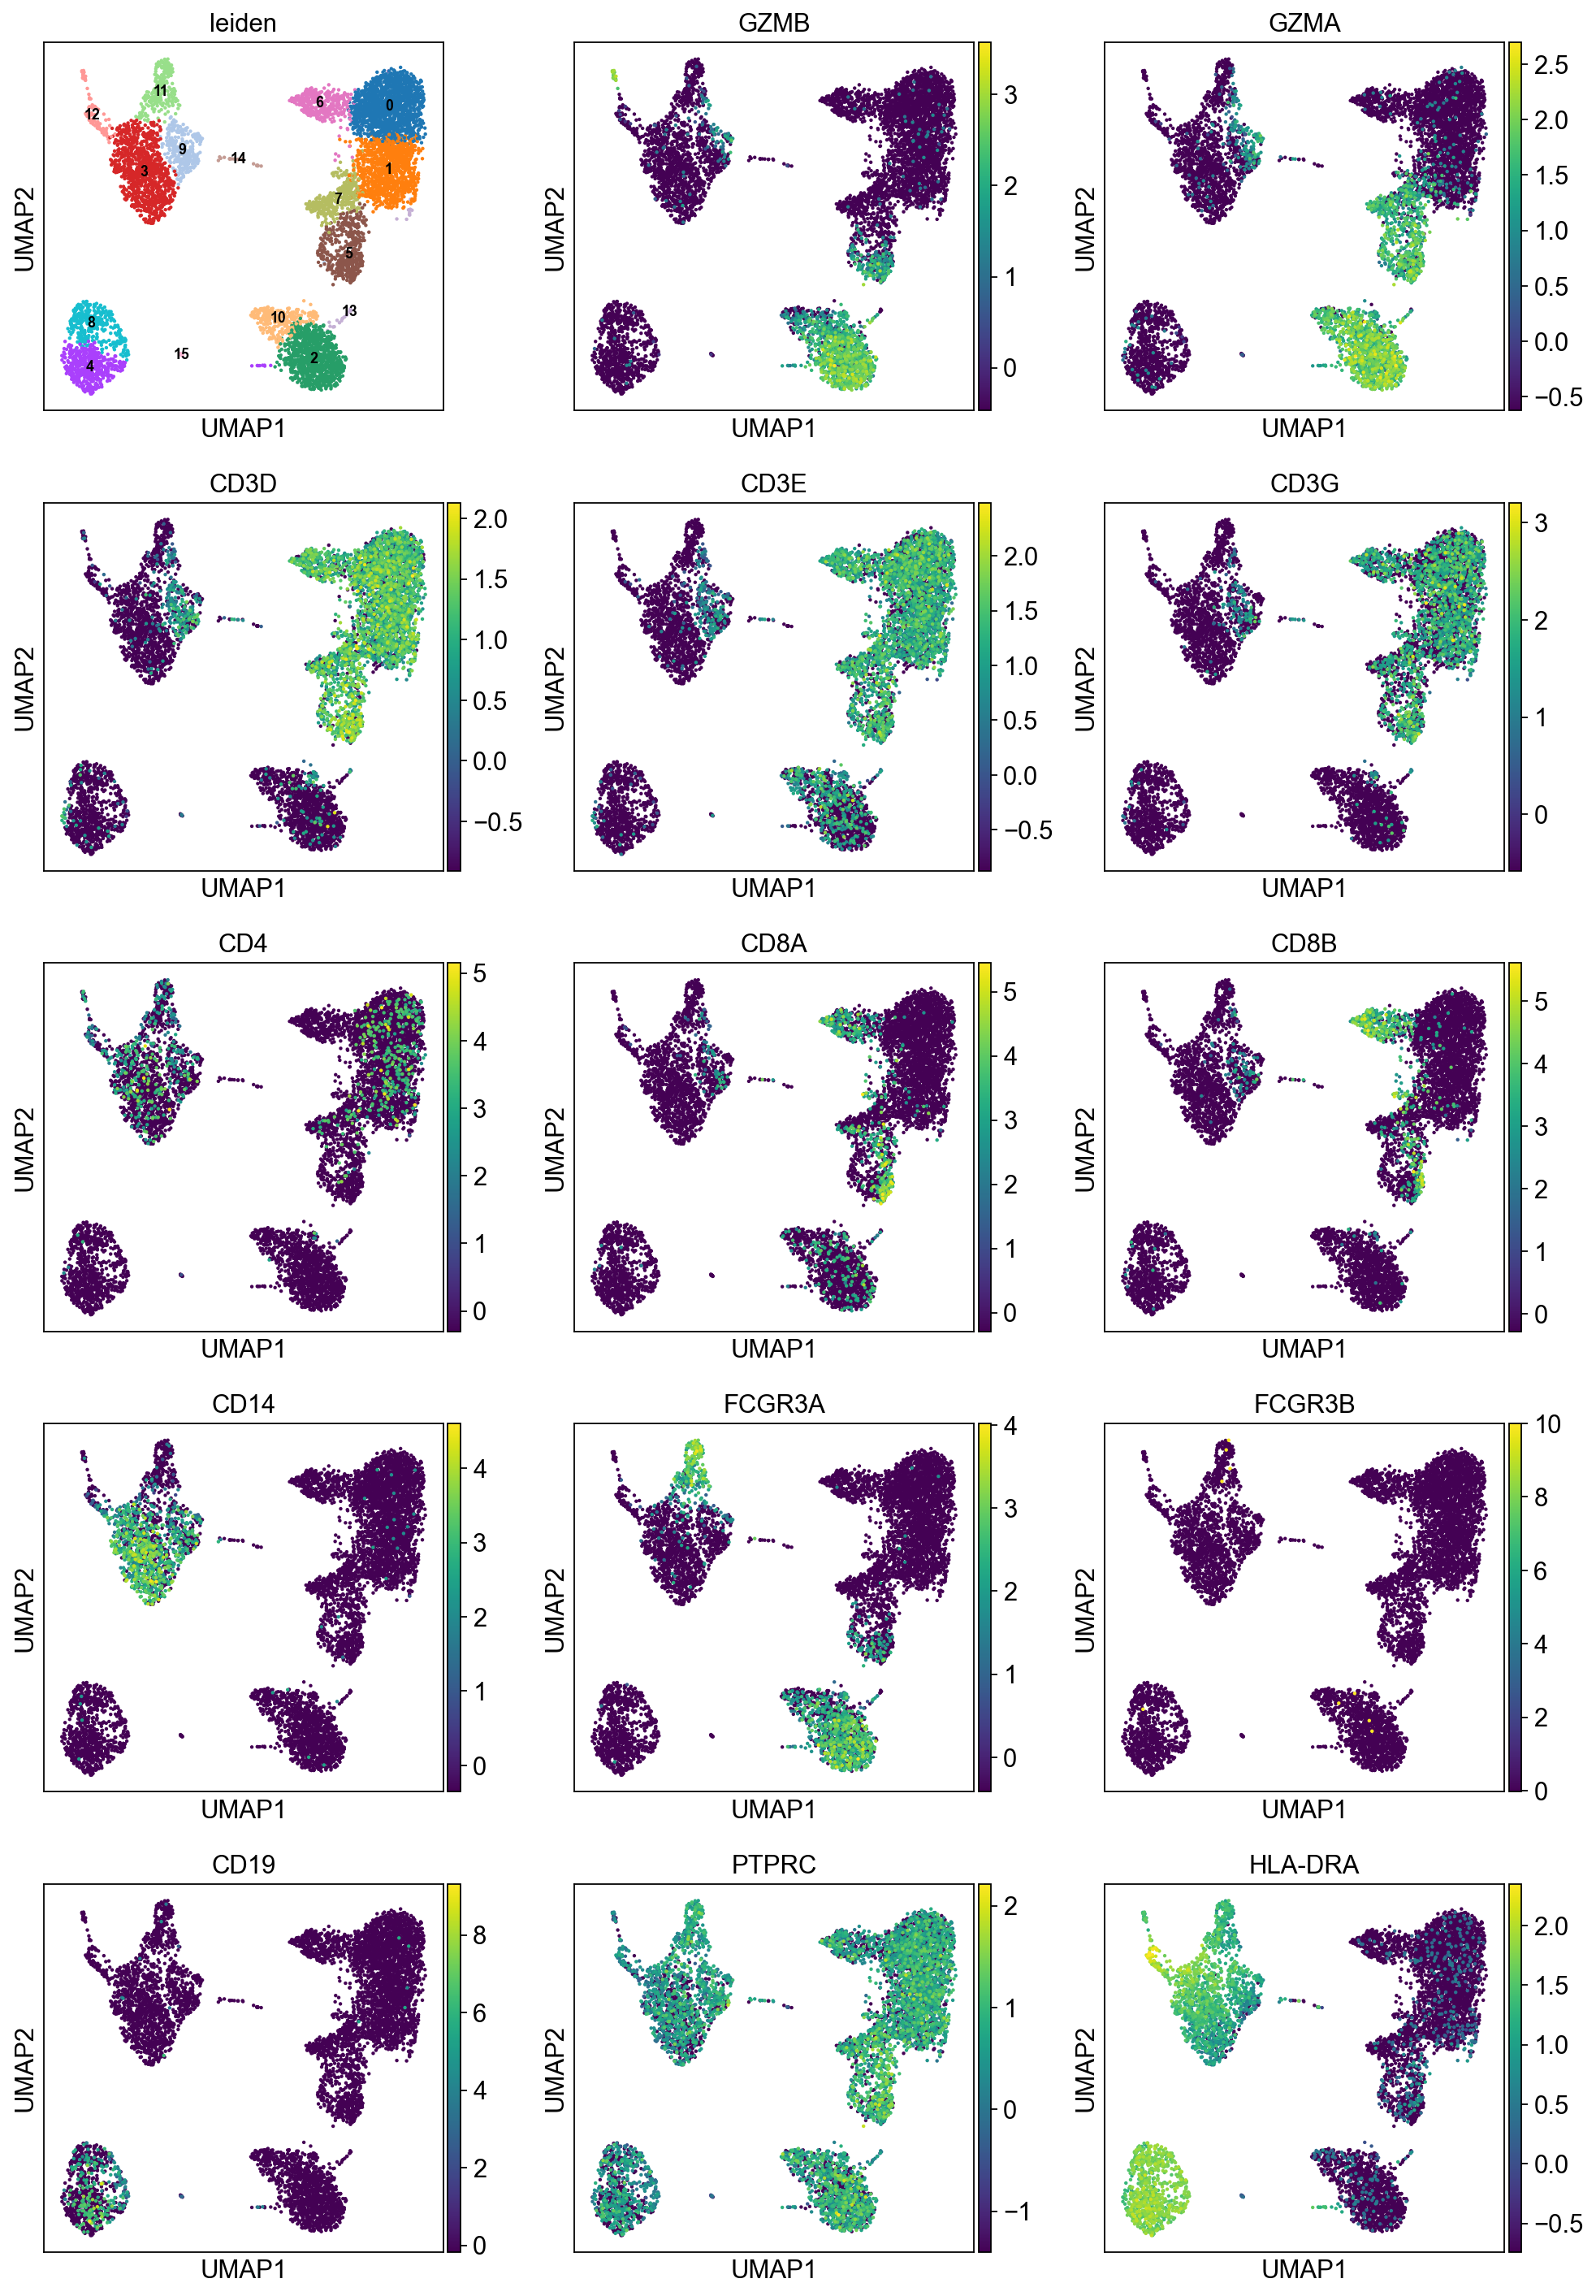

In [26]:
sc.pl.umap(adata, color=['leiden', 
                         'GZMB', 'GZMA', # NK (Granzyme)
                         'CD3D', 'CD3E', 'CD3G', 'CD4', 'CD8A', 'CD8B', # T CD4/CD8
                         'CD14', 'FCGR3A', 'FCGR3B', # MONO CD14 / (CD16 = FCGR)
                         'CD19', 'PTPRC', # B (CD45R = PTPRC)
                         'HLA-DRA',  # DC 
                        ], ncols=3, legend_loc="on data", legend_fontsize=8.)

In [27]:
adata.write("../../CITE-seq/rna.h5ad")